<center>



#  **Business Case: Netflix**


---



In [1]:
# import the necessary libraries for data reading, cleaning, manipulation and Plotting
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Mounting Google Drive to access dataset stored
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [47]:
# reading the csv file using pandas read_csv()
df = pd.read_csv("/content/gdrive/MyDrive/Projects/Business Case Study - Neflix/netflix.csv")
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


##  Basic Data Exploration - High level statistics of the dataset



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
print("\nHigh Level Statistics: ")
print("Number of Points:", len(df))
print("Number of features: ",df.shape )
print("Number of Types: ", df["type"].nunique())
print("Number of Data points per Type: ", df["type"].value_counts())


High Level Statistics: 
Number of Points: 8807
Number of features:  (8807, 12)
Number of Types:  2
Number of Data points per Type:  type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [ ]:
#check if there are any duplicate rows
df.duplicated().sum()

0

In [ ]:
# number of unique values in our data
for i in df.columns:
 print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [ ]:
# check for the count of null values for all
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#checking the occurences of each of the ratings
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
df_copy = df

### Observations:


1.   There are in total 8807 rows with 12 columns
2.   All the columns data types are objects except release_year column
3.   Contains null values in 6 columns ('director', 'country', 'cast', 'date_added', 'rating', 'duration')





---

---

## Data Cleaning

*   Check for Null Values in all the columns
*   Un-nesting of columns with multiple values into different rows using either `melt()` or `explode()`
*   Handle the Null Values
*   Convert the "date_added" column to `pd.to_datetime()` format
*   Create new columns "day_added", "month_added", "year_added" for the detailed analysis





### Un-Nesting :




Un-Nesting

In [52]:
df['cast'] = df['cast'].str.split(', ')
df['listed_in'] = df['listed_in'].str.split(', ')
df['country'] = df['country'].str.split(', ')
df['director'] = df['director'].str.split(', ')

In [53]:
df = df.explode('cast').explode('listed_in').explode('country').explode('director')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201991 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      151348 non-null  object
 4   cast          199845 non-null  object
 5   country       190094 non-null  object
 6   date_added    201833 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201924 non-null  object
 9   duration      201988 non-null  object
 10  listed_in     201991 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [55]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [61]:
print('Columns with Null Values')
print("--" * 12)
for i in df.columns:
  if df[i].isna().sum() > 0:
    print(i,':',df[i].isna().sum())

Columns with Null Values
------------------------
director : 50643
cast : 2146
country : 11897
date_added : 158
rating : 67
duration : 3


In [ ]:
mode_directors = df.groupby('cast')['director'].apply(lambda x: x.mode()[0] if len(x.mode()) > 0 else np.nan).reset_index(name='mode_director')
mode_directors.head()

,cast,mode_director
0,Jr.,Sam Macaroni
1,"""Riley"" Lakdhar Dridi",Rebecca Zlotowski
2,'Najite Dede,Aniedi Anwah
3,2 Chainz,NaN
4,2Mex,Ava DuVernay


In [ ]:
new_df  = df.merge(mode_directors, on='cast', how='left')
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mode_director
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",NaN
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",NaN
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",NaN


In [ ]:
new_df['director'] = new_df['director'].fillna(new_df['mode_director'])
new_df.drop('mode_director', axis=1, inplace=True)


In [ ]:
new_df['director'].isna().sum()

32916

#### Replacing null values in director column with most popular director from the respective country


In [67]:
director_count_country = df.groupby(['country', 'director'])['title'].nunique().reset_index(name='movie_count')

In [69]:
top_directors_country = director_count_country.loc[director_count_country.groupby('country')['movie_count'].idxmax()]

In [74]:
top_directors_country.sort_values('movie_count', ascending=False).head(10)

,country,director,movie_count
5241,United States,Jay Karas,15
3093,Philippines,Cathy Garcia-Molina,13
983,Egypt,Youssef Chahine,12
2830,Mexico,Jan Suter,12
3758,Turkey,Yılmaz Erdoğan,9
1706,India,Anurag Kashyap,9
1566,Hong Kong,Johnnie To,8
2381,Indonesia,Hanung Bramantyo,8
529,Canada,Justin G. Dyck,8
2685,Japan,Toshiya Shinohara,7


In [80]:
df[df['director'] == 'Anurag Kashyap']['title'].unique()

array(['Black Friday', 'Raman Raghav 2.0', 'Bombay Talkies',
       'Choked: Paisa Bolta Hai', 'Ghost Stories', 'Sacred Games',
       'Dev.D', 'Lust Stories', 'Ugly'], dtype=object)

In [62]:
# group by country and director then count the number of movies for each director for each country
director_count_country = df.groupby(['country', 'director'])['title'].nunique().reset_index(name='movie_count')

# the director with most films from r=each country
top_directors_country = director_count_country.loc[director_count_country.groupby('country')['movie_count'].idxmax()]

#dictionary creation for every country and respective director
top_directors_dict = top_directors_country.set_index('country')['director'].to_dict()

In [63]:
df['director'].isna().sum() # all the nulls in the director column

50643

In [64]:
top_directors_dict

{'': 'Najwa Najjar',
 'Afghanistan': 'Pieter-Jan De Pue',
 'Albania': 'Antonio Morabito',
 'Algeria': 'Maïwenn',
 'Angola': 'Chris Roland',
 'Argentina': 'Jan Suter',
 'Armenia': 'Matthew Salleh',
 'Australia': 'Clay Glen',
 'Austria': 'Abu Bakr Shawky',
 'Bahamas': 'Martin Campbell',
 'Bangladesh': 'Abdullah Al Noor',
 'Belgium': 'Jalil Lespert',
 'Bermuda': 'Fisher Stevens',
 'Botswana': 'Ben Bowie',
 'Brazil': 'Diego Pignataro',
 'Bulgaria': 'Don Michael Paul',
 'Burkina Faso': 'Haile Gerima',
 'Cambodia': 'Angelina Jolie',
 'Cambodia,': 'Denis Do',
 'Cameroon': 'Enah Johnscott',
 'Canada': 'Justin G. Dyck',
 'Cayman Islands': 'Peter Lepeniotis',
 'Chile': 'Pablo Larraín',
 'China': 'Wilson Yip',
 'Colombia': 'Fernando Ayllón',
 'Croatia': 'Ivona Juka',
 'Czech Republic': 'Andreas Prochaska',
 'Denmark': 'Lars von Trier',
 'Dominican Republic': 'Johannes Roberts',
 'East Germany': 'Mel Stuart',
 'Ecuador': 'Fisher Stevens',
 'Egypt': 'Youssef Chahine',
 'Ethiopia': 'Haile Gerima',
 

In [65]:
df['director'].isna().sum() #still there are some values that has nan in director columnd

50643

#### Replacing nan director with top cast from the same country

In [ ]:
new_df2 = df

In [ ]:
new_df2['director'].isna().sum()

50643

In [ ]:
def replace_director(x):
    if pd.isnull(x['director']):
        country = x['country']
        if country in top_directors_dict:
            return top_directors_dict[country]
    return x['director']  #if not null leaves as it is

# apply the function
new_df['director'] = new_df.apply(replace_director, axis=1)

In [ ]:
# Get indices of rows where 'director' is null and corresponding 'country' is in top_directors_dict
null_director_indices = new_df['director'].isnull() & new_df['country'].isin(top_directors_dict)

# Replace null 'director' values with values from top_directors_dict
new_df.loc[null_director_indices, 'director'] = new_df.loc[null_director_indices, 'country'].map(top_directors_dict)


In [ ]:
new_df['director'].isna().sum()

3645

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201991 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      151348 non-null  object
 4   cast          199845 non-null  object
 5   country       190094 non-null  object
 6   date_added    201833 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201924 non-null  object
 9   duration      201988 non-null  object
 10  listed_in     201991 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [ ]:
# same as above just replace direcot with cast
cast_counts_by_country = df.groupby(['country', 'cast'])['title'].nunique().reset_index(name='movie_count')
top_actors_by_country = cast_counts_by_country.loc[cast_counts_by_country.groupby('country')['movie_count'].idxmax()]
top_actors_dict = top_actors_by_country.set_index('country')['cast'].to_dict()

In [ ]:
def replace_director_actor(x):
    if pd.isnull(x['director']):
        country = x['country']
        if country in top_actors_dict:
            return top_actors_dict[country]
    return x['director']

df['director'] = df.apply(replace_director_actor, axis=1)

In [ ]:
df['director'].isna().sum() # all nan in diretor column are replaced with appropritae logic

0

In [ ]:
# in the same way as we handled direcotr we will replace actors(cast column)
df['cast'].isna().sum()

2149

In [ ]:
def replace_actor(x):
    if pd.isnull(x['cast']):
        country = x['country']
        if country in top_actors_dict:
            return top_actors_dict[country]
    return x['cast']

df['cast'] = df.apply(replace_actor, axis=1)

In [ ]:
df['cast'].isna().sum()
# all nulls are replaced except 12 records

12

In [ ]:
#as these are the records with single movie/show produced from the respective countries
df['cast'] = df['cast'].fillna(df['director'])

In [ ]:
df['cast'].isna().sum()

0

### Duration Column

In [ ]:
df[df['duration'].isna()]
# we can see here in rating column we have duration and duration is null
# here replacinng the duration column from respective rating column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
duration_nan = df['duration'].isna()
df.loc[duration_nan, 'duration'] = df.loc[duration_nan, 'rating']

In [ ]:
df['duration'].isna().sum()

0

### Rating Column

In [ ]:
filt=df['rating'].isin(['74 min','84 min','66 min'])
df.loc[filt,'rating']='Unknown'

In [ ]:
df['date_added']=df['date_added'].str.strip()
df['date_added']=pd.to_datetime(df['date_added'],format="%B %d, %Y")
df['week_added']=df['date_added'].dt.isocalendar().week
df['month_added']=df['date_added'].dt.month
df['year_added']=df['date_added'].dt.year

## Visualization:


In [ ]:
df_type = df.groupby('type')['title'].nunique().reset_index().sort_values('type',ascending=False)
df_type.columns = ['Type','Count']
df_type = df_type.reset_index()
df_type.drop(columns='index',inplace=True)

In [ ]:
df_type

,Type,Count
0,TV Show,2676
1,Movie,6131


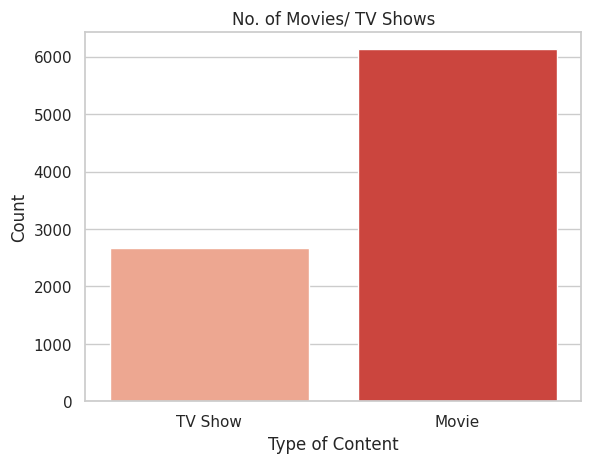

In [ ]:
sns.barplot(data = df_type,x ='Type', y= 'Count',palette="Reds")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.title("No. of Movies/ TV Shows")
plt.show()

In [ ]:
movie_group=df.loc[df['type'] == "Movie"]
tv_group=df.loc[df['type'] == "TV Show"]

In [ ]:
#top10 movie countries
country_group_movies=movie_group.groupby('country')['title'].nunique().reset_index().sort_values('title',ascending=False)
country_group_movies.columns=['country','Count']
country_group_movies=country_group_movies.iloc[:11].reset_index()
country_group_movies.drop(columns='index',inplace=True)

#top10 tv show countries
country_group_tv=tv_group.groupby('country')['title'].nunique().reset_index().sort_values('title',ascending=False)
country_group_tv.columns=['country','Count']
country_group_tv=country_group_tv.iloc[:11].reset_index()
country_group_tv.drop(columns='index',inplace=True)

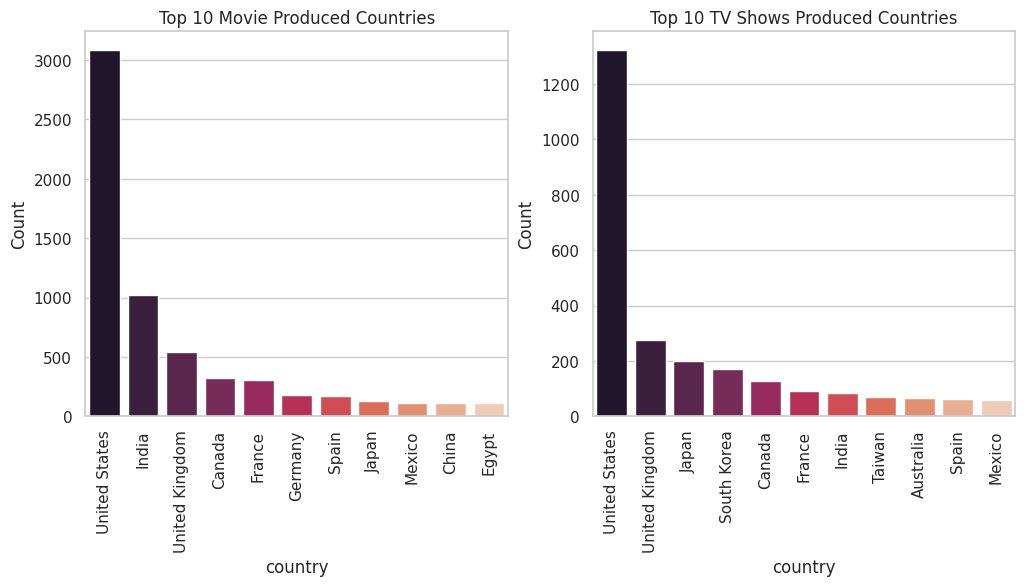

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.barplot(data=country_group_movies,x='country',y='Count', palette = 'rocket')
plt.xticks(rotation=90)
plt.title('Top 10 Movie Produced Countries')
plt.subplot(1,2,2)
sns.barplot(data=country_group_tv,x='country',y='Count', palette = 'rocket')
plt.xticks(rotation=90)
plt.title('Top 10 TV Shows Produced Countries')
plt.show()

Insights:


*   USA leads in both Movie and TV Show count
*   UK is in top3 in both Movies and TV Shows
*   India is second leading in Movies where as Japan is top3 with respect to TV Shows



In [ ]:
# top 10 actor - movies
cast_group_movies=movie_group.groupby('cast')['title'].nunique().reset_index().sort_values('title',ascending=False)
cast_group_movies.columns=['cast','Count']
cast_group_movies=cast_group_movies.iloc[:11].reset_index()
cast_group_movies.drop(columns='index',inplace=True)

# top 10 actor - tv show
cast_group_tv=tv_group.groupby('cast')['title'].nunique().reset_index().sort_values('title',ascending=False)
cast_group_tv.columns=['cast','Count']
cast_group_tv=cast_group_tv.iloc[:11].reset_index()
cast_group_tv.drop(columns='index',inplace=True)

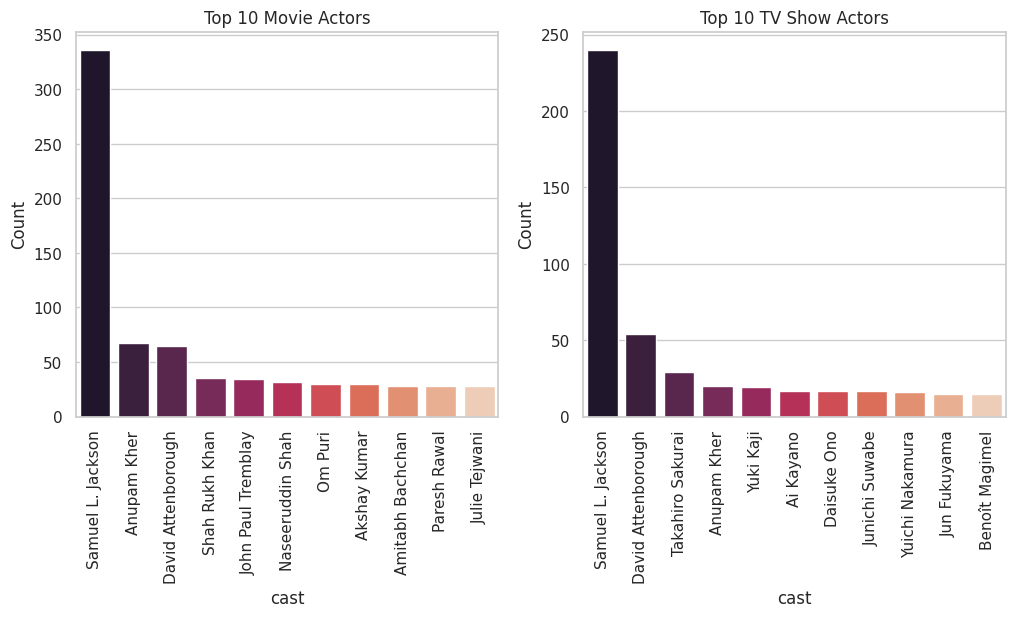

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.barplot(data=cast_group_movies,x='cast',y='Count', palette = 'rocket')
plt.xticks(rotation=90)
plt.title('Top 10 Movie Actors')
plt.subplot(1,2,2)
sns.barplot(data=cast_group_tv,x='cast',y='Count', palette = 'rocket')
plt.xticks(rotation=90)
plt.title('Top 10 TV Show Actors')
plt.show()

In [ ]:
# top 10 director - tv show
director_group_movies=movie_group.groupby('director')['title'].nunique().reset_index().sort_values('title',ascending=False)
director_group_movies.columns=['director','Count']
director_group_movies=director_group_movies.iloc[:11].reset_index()
director_group_movies.drop(columns='index',inplace=True)

#director - tv show
director_group_tv=tv_group.groupby('director')['title'].nunique().reset_index().sort_values('title',ascending=False)
director_group_tv.columns=['director','Count']
director_group_tv=director_group_tv.iloc[:11].reset_index()
director_group_tv.drop(columns='index',inplace=True)

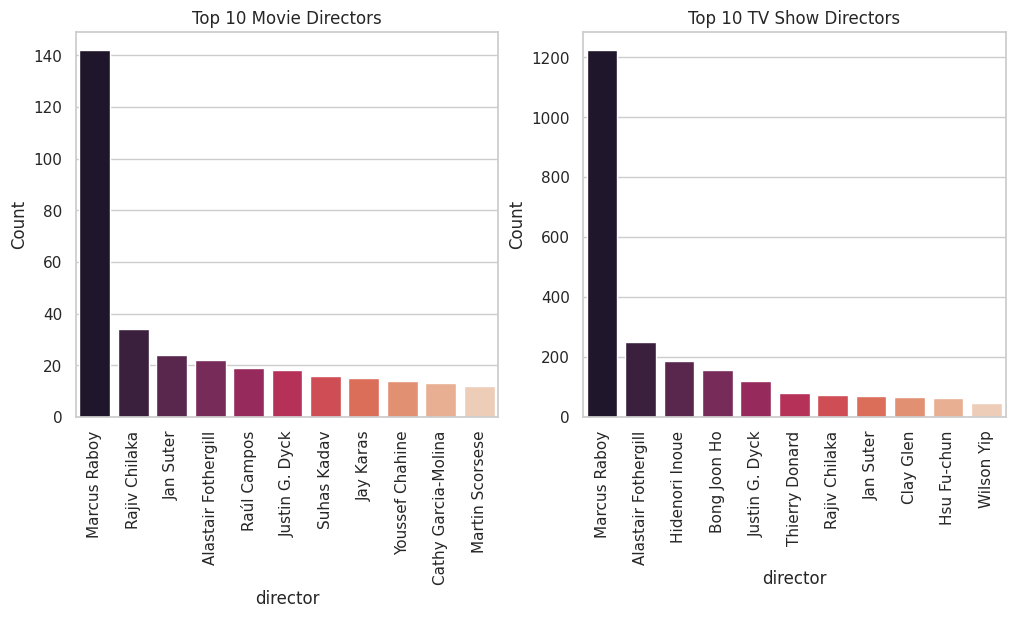

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.barplot(data=director_group_movies,x='director',y='Count', palette = 'rocket')
plt.xticks(rotation=90)
plt.title('Top 10 Movie Directors')
plt.subplot(1,2,2)
sns.barplot(data=director_group_tv,x='director',y='Count', palette = 'rocket')
plt.xticks(rotation=90)
plt.title('Top 10 TV Show Directors')
plt.show()

In [ ]:
rating_group=df.groupby('rating')['title'].nunique().reset_index().sort_values('title',ascending=False)
rating_group.columns=['rating','count']
rating_group=pd.merge(rating_group, df[['rating', 'type']], on='rating', how='left')
rating_group=rating_group.drop_duplicates(subset='rating').reset_index().drop(columns=['index'])

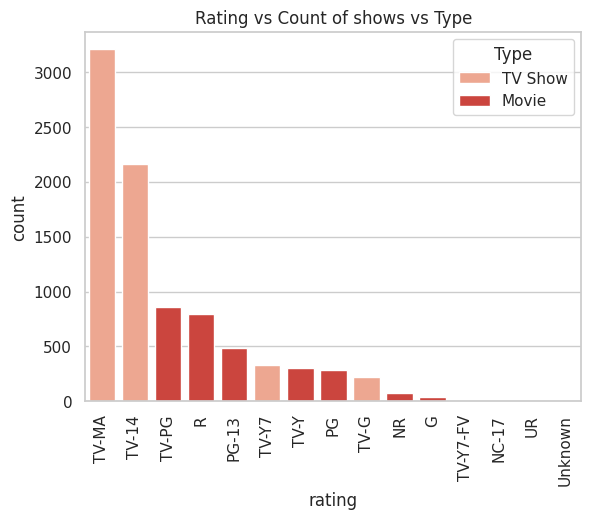

In [ ]:
sns.set(style="whitegrid")
sns.barplot(data=rating_group,x='rating',y='count',hue='type', palette = 'Reds')
plt.xticks(rotation=90)
plt.title('Rating vs Count of shows vs Type')
plt.legend(title='Type')
plt.show()

In [ ]:
# top genre - movies
listed_in_group=movie_group.groupby('listed_in')['title'].nunique().reset_index().sort_values('title',ascending=False)
listed_in_group.columns=['listed_in','count']
listed_in_group=listed_in_group.reset_index()
listed_in_group.drop(columns='index',inplace=True)

# top genre - tv show
listed_tv_in_group=tv_group.groupby('listed_in')['title'].nunique().reset_index().sort_values('title',ascending=False)
listed_tv_in_group.columns=['listed_in','count']
listed_tv_in_group=listed_tv_in_group.reset_index()
listed_tv_in_group.drop(columns='index',inplace=True)

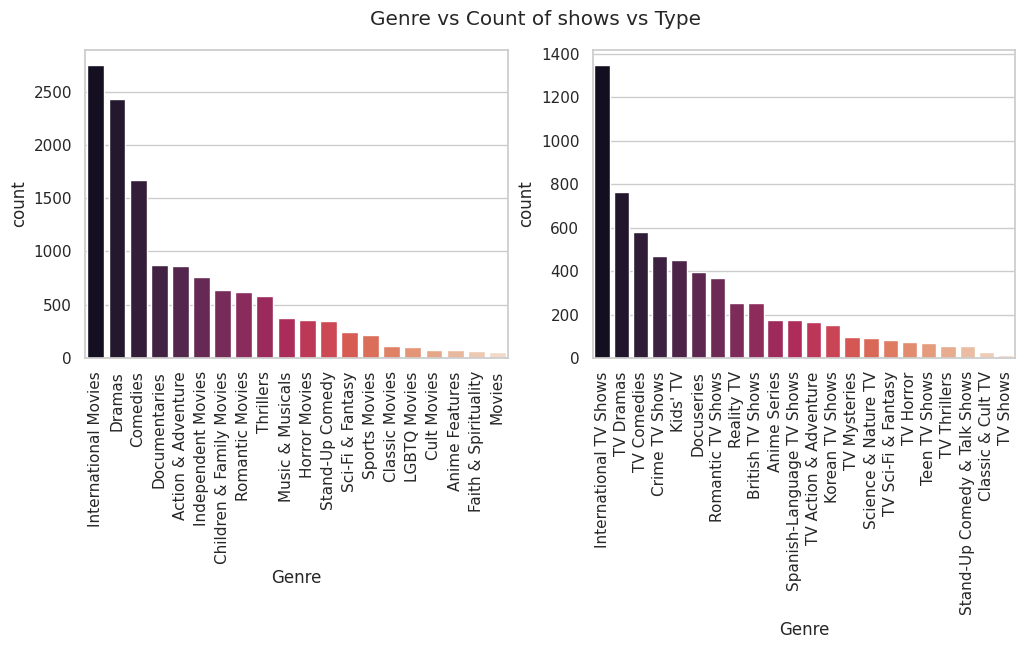

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot(data=listed_in_group, x='listed_in',y='count',palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.subplot(1,2,2)
sns.barplot(data=listed_tv_in_group,x='listed_in',y='count',palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.suptitle('Genre vs Count of shows vs Type')
plt.show()

Insights:



*   Most produced genres for Movies are International Movies, Dramas, and Comedies.
*   For TV Shows, it's International TV Shows and TV Dramas.



In [ ]:
# movie duration
movieduration=movie_group.groupby('duration')['title'].nunique().reset_index().sort_values('title',ascending=False)
movieduration.columns=['duration','count']
movieduration.reset_index(inplace=True)
movieduration.drop(columns=['index'],inplace=True)
movieduration['duration'] = movieduration['duration'].str.extract('(\d+)')
movieduration['duration'] = pd.to_numeric(movieduration['duration'])

# tv duration
tv_showduration=tv_group.groupby('duration')['title'].nunique().reset_index().sort_values('title',ascending=False)
tv_showduration.columns=['duration','count']
tv_showduration.reset_index(inplace=True)
tv_showduration.drop(columns=['index'],inplace=True)
tv_showduration['duration'] = tv_showduration['duration'].str.extract('(\d+)')
tv_showduration['duration'] = pd.to_numeric(tv_showduration['duration'])

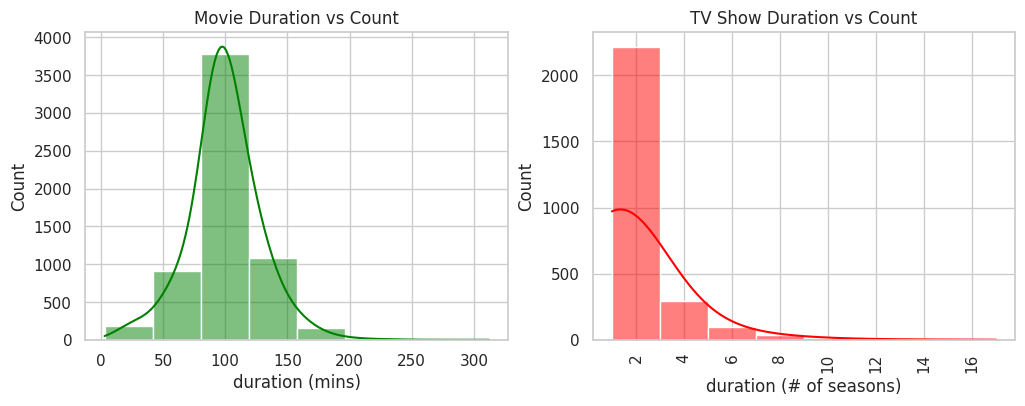

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.histplot(data=movieduration,x='duration',weights='count',bins=8,kde=True,color='green')
plt.title('Movie Duration vs Count')
plt.xlabel('duration (mins)')
plt.subplot(1,2,2)
sns.histplot(data=tv_showduration,x='duration',weights='count',bins=8,kde=True,color='red')
plt.title('TV Show Duration vs Count')
plt.xlabel('duration (# of seasons)')
plt.xticks(rotation=90)
plt.show()

Insights:


*   Distribution of movie duration is slightly right-skewed, with a peak at 90 to 100 minutes.
*   TV Shows have a peak around 1 season, with a median of 2-3 seasons.



In [ ]:
#best week for movie release
weekmovie=movie_group.groupby('week_added',as_index=False)['title'].nunique()
weekmovie.columns=['week','uniquecount']
weekmovie = weekmovie.sort_values('uniquecount', ascending=False).iloc[:10, :]
weekmovie.reset_index(inplace=True)
weekmovie.drop(columns=['index'],inplace=True)
weekmovie['week']=weekmovie['week'].astype(int)

In [ ]:
#best week for TV Show release
weektv_show=tv_group.groupby('week_added',as_index=False)['title'].nunique()
weektv_show.columns=['week','uniquecount']
weektv_show = weektv_show.sort_values('uniquecount', ascending=False).iloc[:10, :]
weektv_show.reset_index(inplace=True)
weektv_show.drop(columns=['index'],inplace=True)

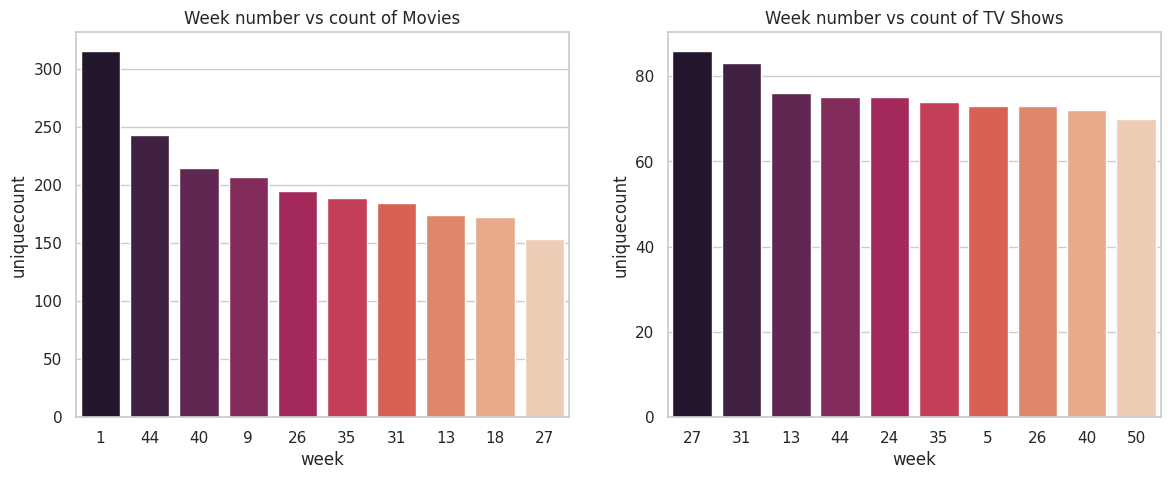

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.barplot(data=weekmovie, x='week', y='uniquecount', order=weekmovie['week'].tolist(),palette = 'rocket')
plt.title('Week number vs count of Movies')
plt.subplot(1,2,2)
sns.set(style="whitegrid")
sns.barplot(data=weektv_show, x='week', y='uniquecount', order=weektv_show['week'].tolist(),palette = 'rocket')
plt.title('Week number vs count of TV Shows')
plt.show()

In [ ]:
# best month Movie release
monthmovie=movie_group.groupby('month_added',as_index=False)['title'].nunique()
monthmovie.columns=['month','count']
monthmovie = monthmovie.sort_values('count', ascending=False).iloc[:10, :]
monthmovie.reset_index(inplace=True)
monthmovie.drop(columns=['index'],inplace=True)

# best month for TV Show release
monthtv_show=tv_group.groupby('month_added',as_index=False)['title'].nunique()
monthtv_show.columns=['month','count']
monthtv_show = monthtv_show.sort_values('count', ascending=False).iloc[:10, :]
monthtv_show.reset_index(inplace=True)
monthtv_show.drop(columns=['index'],inplace=True)

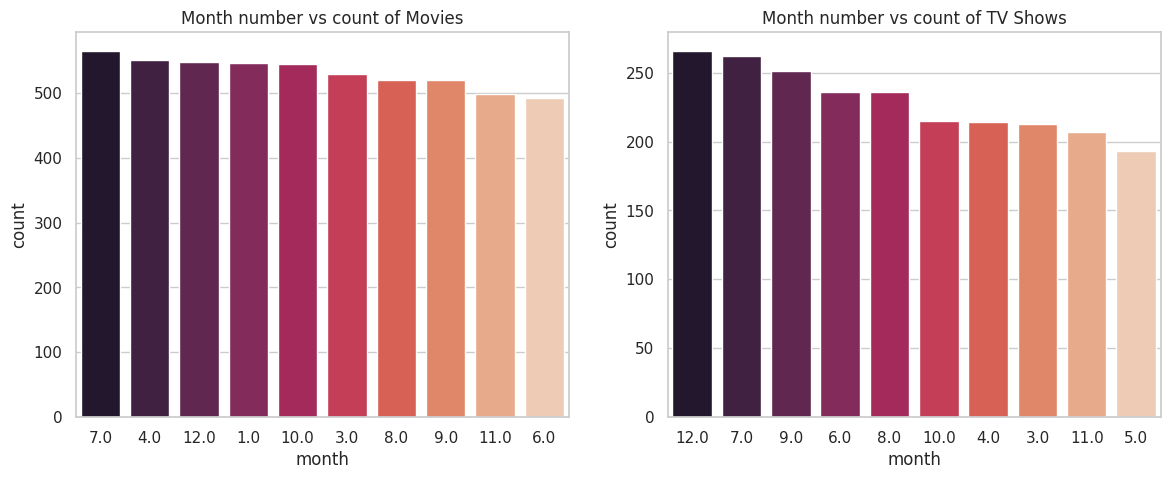

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.barplot(data=monthmovie, x='month', y='count', order=monthmovie['month'].tolist(),palette = 'rocket')
plt.title('Month number vs count of Movies')
plt.subplot(1,2,2)
sns.barplot(data=monthtv_show, x='month', y='count', order=monthtv_show['month'].tolist(),palette = 'rocket')
plt.title('Month number vs count of TV Shows')
plt.show()

Insights:



*   Most Movies are added in week 1, and most TV Shows are added in week 27.
*   July is the peak month for adding Movies whereas for TV Shows it is December.




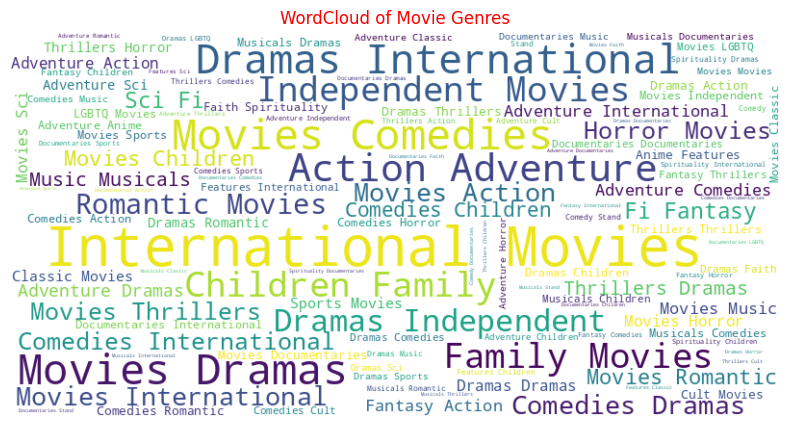

In [ ]:
all_genres = ' '.join(movie_group['listed_in'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud of Movie Genres',color='red')
plt.axis('off')
plt.show()

In [ ]:
dfcopy=df.copy(deep=False).reset_index()
dfcopy['added_year']=dfcopy['date_added'].dt.year
dfcopy.drop_duplicates(subset=['show_id','date_added','type'],inplace=True)
dfcopy=dfcopy.groupby(['type','added_year'],as_index=False)['show_id'].count()
dfcopy.rename(columns={'show_id':'count'},inplace=True)
dfcopy.sort_values('count',ascending=False).reset_index().drop(columns='index',inplace=True)

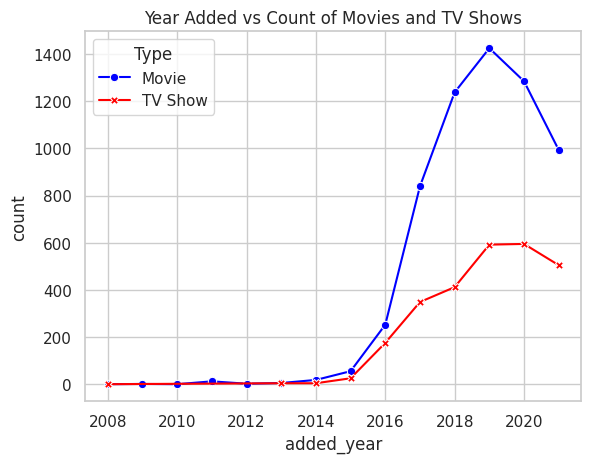

In [ ]:
sns.set(style="whitegrid")
sns.lineplot(data=dfcopy,x='added_year',y='count',style='type',hue='type',
            markers=True,dashes=False,palette={'Movie': 'blue', 'TV Show': 'red'})
plt.legend(title='Type',loc='upper left')
plt.title('Year Added vs Count of Movies and TV Shows')
plt.show()

Insights:

The number of movies and TV Shows added per year is both similar increasing curves from 2015 to 2019 and then decreasing.Between movies and TV shows more number of movies are added each year so Netflix is not focusing more on TV Shows recently.

## **Recommendations**:



1.   Focus on producing more International Movies, Dramas, and Comedies, as these genres have shown popularity. For TV Shows, prioritize International TV Shows and TV Dramas
2.   Movies of duration close to 2 hrs and TV Shows with 1-4 seasons suggested.
3.   USA is leading the consumer market for Netflix, create content thet should resound with bigger market audiences like USA.
4.   For Movies consider releasing in Week 1 and July to  maximize viewership
5.   For TV shows Week 27 and December seems to be popular, aligning releases with these times may attract more audience
6.   For future projects include casts & directors from the top 10  members for both Movie and TV Shows categories.
7. Find out why after 2019-2020 there is a decline in number of movies released as well as number of movies added and solve the problem.
8. As there is a higher number of movies added each year compared to TV shows, consider a balanced approach based on the observed trend.
